In [1]:
#importing libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the training set**

In [2]:
#reading the train data
df=pd.read_csv("/content/Train_Data.csv")
df.head()

,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma,pred
0,y,83.71,63.0,7.2,52.5,14.0232,130.8300,12.4280,188.8425,8.9520,201.1905,9.2896,141.9075,16.0968,150.3390,12.4880,173.1240,m78,0
1,y,108.94,31.5,12.8,84.0,13.2840,128.8350,13.5256,183.0990,8.8520,207.2385,8.4704,154.7805,13.3304,101.0205,12.5096,131.4075,m78,0
2,E,169.65,0.0,5.6,73.5,14.5472,128.9295,13.6424,174.4680,8.9800,190.3125,11.3056,156.7650,NaN,122.5350,11.7136,176.8200,m76,1
3,x,122.42,31.5,7.2,63.0,15.0152,119.8575,12.3344,186.8580,10.7208,193.8195,10.6096,175.7490,NaN,124.8030,13.8424,168.2625,m55,0
4,E,125.43,94.5,7.2,42.0,14.4176,135.4290,14.5824,187.8135,9.3088,203.1540,9.8280,172.7040,14.4720,120.2145,NaN,150.1185,m76,0


**Performing Exploratory Data Analysis**

In [ ]:
df.dtypes

pc       object
ld      float64
m0      float64
m1      float64
m2      float64
m3      float64
m4      float64
m5      float64
m6      float64
m7      float64
m8      float64
m9      float64
m10     float64
m11     float64
m12     float64
m13     float64
m14     float64
ma       object
pred      int64
dtype: object

<Axes: >

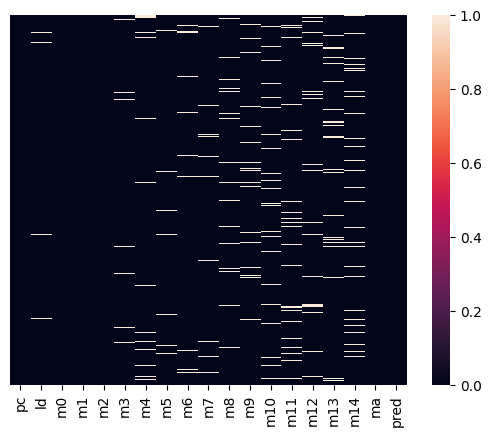

In [ ]:
#finding null values in dataframe
sns.heatmap(pd.isnull(df),yticklabels=0)

<Axes: xlabel='pred', ylabel='count'>

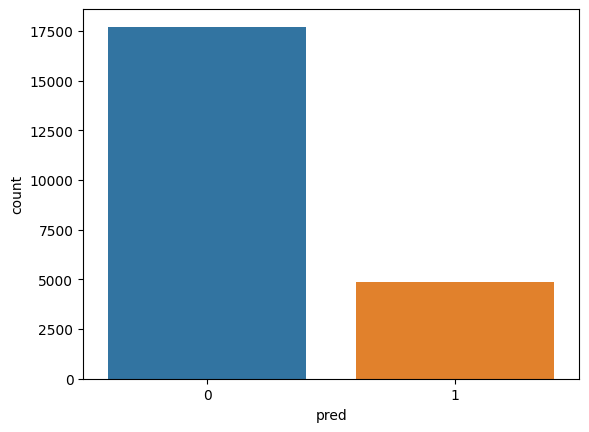

In [ ]:
sns.countplot(x='pred',data=df)
#heavily imbalanced dataset

**Performing Data Preprocessing**

In [3]:
#importing sklearn imputer models
import sklearn
from sklearn.impute import KNNImputer

In [4]:
imputer=KNNImputer(n_neighbors=3)
d=df.drop(['pc','pred','ma'],axis=1)
d_imp=imputer.fit_transform(d)
d_imp=pd.DataFrame(d_imp,columns=d.columns)
d_imp['pc']=df['pc']
d_imp['ma']=df['ma']
d_imp['pred']=df['pred']

In [5]:
d_imp.head()

,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,pc,ma,pred
0,83.71,63.0,7.2,52.5,14.0232,130.8300,12.4280,188.8425,8.9520,201.1905,9.2896,141.9075,16.096800,150.3390,12.488000,173.1240,y,m78,0
1,108.94,31.5,12.8,84.0,13.2840,128.8350,13.5256,183.0990,8.8520,207.2385,8.4704,154.7805,13.330400,101.0205,12.509600,131.4075,y,m78,0
2,169.65,0.0,5.6,73.5,14.5472,128.9295,13.6424,174.4680,8.9800,190.3125,11.3056,156.7650,13.618933,122.5350,11.713600,176.8200,E,m76,1
3,122.42,31.5,7.2,63.0,15.0152,119.8575,12.3344,186.8580,10.7208,193.8195,10.6096,175.7490,14.837600,124.8030,13.842400,168.2625,x,m55,0
4,125.43,94.5,7.2,42.0,14.4176,135.4290,14.5824,187.8135,9.3088,203.1540,9.8280,172.7040,14.472000,120.2145,12.900267,150.1185,E,m76,0


<Axes: >

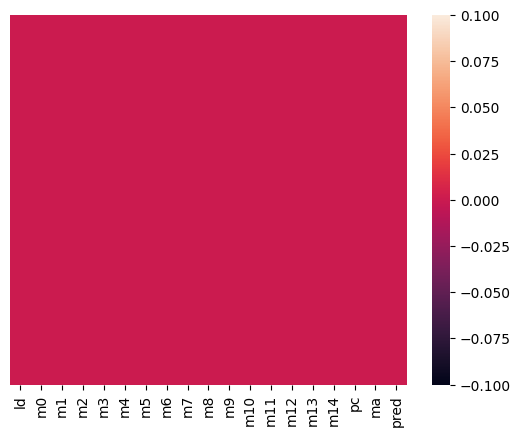

In [6]:
#Imputation performed successfully, no null values found!!!
sns.heatmap(pd.isnull(d_imp),yticklabels=0)

In [7]:
#Scaling the columns to prevent effects of outliers
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
data=d_imp.values[:,:-3]
d=trans.fit_transform(data)

In [8]:
cols=d_imp.iloc[:,:-3].columns
d_scale=pd.DataFrame(d,columns=cols)
d_scale['pc']=d_imp['pc']
d_scale['ma']=d_imp['ma']
d_scale['pred']=d_imp['pred']

In [9]:
d_scale.head()

,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,pc,ma,pred
0,0.143323,0.222222,0.310345,0.208333,0.472846,0.525248,0.316071,0.596964,0.432425,0.459139,0.517460,0.307211,0.576114,0.732314,0.399222,0.558231,y,m78,0
1,0.214857,0.111111,0.551724,0.333333,0.350153,0.502832,0.475383,0.535002,0.415649,0.526193,0.387429,0.401963,0.310522,0.356434,0.401506,0.256401,y,m78,0
2,0.386986,0.000000,0.241379,0.291667,0.559819,0.503893,0.492336,0.441889,0.437123,0.338533,0.837460,0.416570,0.338223,0.520407,0.317348,0.584973,E,m76,1
3,0.253076,0.111111,0.310345,0.250000,0.637498,0.401958,0.302485,0.575555,0.729164,0.377416,0.726984,0.556303,0.455223,0.537692,0.542417,0.523057,x,m55,0
4,0.261610,0.333333,0.310345,0.166667,0.538308,0.576923,0.628774,0.585863,0.492283,0.480908,0.602921,0.533890,0.420123,0.502721,0.442809,0.391780,E,m76,0


In [10]:
#pc and ma are categorical variables so we will use label encoder on them
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d_scale['pc']=le.fit_transform(d_scale['pc'])
d_scale['ma']=le.fit_transform(d_scale['ma'])

In [ ]:
d_scale.head()

,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,pc,ma,pred
0,0.143323,0.222222,0.310345,0.208333,0.472846,0.525248,0.316071,0.596964,0.432425,0.459139,0.517460,0.307211,0.576114,0.732314,0.399222,0.558231,3,3,0
1,0.214857,0.111111,0.551724,0.333333,0.350153,0.502832,0.475383,0.535002,0.415649,0.526193,0.387429,0.401963,0.310522,0.356434,0.401506,0.256401,3,3,0
2,0.386986,0.000000,0.241379,0.291667,0.559819,0.503893,0.492336,0.441889,0.437123,0.338533,0.837460,0.416570,0.338223,0.520407,0.317348,0.584973,0,2,1
3,0.253076,0.111111,0.310345,0.250000,0.637498,0.401958,0.302485,0.575555,0.729164,0.377416,0.726984,0.556303,0.455223,0.537692,0.542417,0.523057,2,0,0
4,0.261610,0.333333,0.310345,0.166667,0.538308,0.576923,0.628774,0.585863,0.492283,0.480908,0.602921,0.533890,0.420123,0.502721,0.442809,0.391780,0,2,0


**Splitting the data into train set and validation set**

Also, the data is heavily imbalanced, so we will perform SMOTE oversampling of data on training set.

In [11]:
from sklearn.model_selection import train_test_split
X=d_scale.drop('pred',axis=1)
y=d_scale.pred
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.33,random_state=0)
over=SMOTE(random_state=0)
X_train,y_train=over.fit_resample(X_train,y_train)

<Axes: xlabel='pred', ylabel='count'>

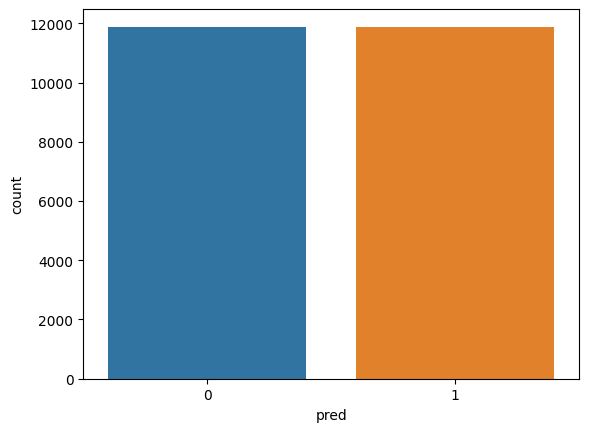

In [12]:
sns.countplot(x=y_train)

In [13]:
y_train.value_counts()

0    11883
1    11883
Name: pred, dtype: int64

In [14]:
y_valid.value_counts()

0    5828
1    1625
Name: pred, dtype: int64

In [15]:
X_train.shape

(23766, 18)

In [16]:
X_valid.shape

(7453, 18)

In [17]:
y_train.shape

(23766,)

In [18]:
y_valid.shape

(7453,)

**Building Models and evaluating their performances through F1 scores**

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [20]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    print(confusion_matrix(y_valid, preds))
    accuracy = round(accuracy_score(y_valid, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')
    f1= round(f1_score(y_valid, preds), 5)
    print('f1_score for', title, ':', f1, '\n')

In [ ]:
model_1=XGBClassifier(booster='gbtree',objective="binary:logistic",n_estimators=1000,learning_rate=0.05,n_jobs=-1,random_state=0)
score(model_1,"XGB Classifier")

[[5677  151]
 [1567   58]]
Accuracy for XGB Classifier : 0.76949 

f1_score for XGB Classifier : 0.06325 



In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
model_2=GaussianNB()
params={'var_smoothing':np.logspace(0,-9,num=100)}
clf=GridSearchCV(model_2,params,cv=5)
clf.fit(X_train,y_train)
best_params=clf.best_params_
model_2=GaussianNB(**best_params)
score(model_2,'Gaussian NB')

[[3225 2603]
 [ 792  833]]
Accuracy for Gaussian NB : 0.54448 

f1_score for Gaussian NB : 0.32918 



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model_3=KNeighborsClassifier()
params={'n_neighbors':[5,6,7],'weights':['uniform','distance'],'metric':['minkowski','euclidean','manhattan']}
clf=GridSearchCV(model_3,params,cv=5,n_jobs=-1)
clf.fit(X_train,y_train)
best_params=clf.best_params_
model_3=KNeighborsClassifier(**best_params,algorithm='ball_tree',leaf_size=6)
score(model_3,'KNN')

[[1820 1702]
 [ 490  505]]
Accuracy for KNN : 0.51472 

f1_score for KNN : 0.31543 



In [22]:
model_4=DecisionTreeClassifier(random_state=0)
params={'criterion':['gini','entropy'],
        'splitter':['best','random'],
        'min_samples_split':[2,3,4,5]}
clf=GridSearchCV(model_4,params,cv=5)
clf.fit(X_train,y_train)
best_params=clf.best_params_
model_4=DecisionTreeClassifier(**best_params,random_state=0,max_depth=7)
score(model_4,'Decision Tree')
#highest f1 score

[[2552 3276]
 [ 625 1000]]
Accuracy for Decision Tree : 0.47659 

f1_score for Decision Tree : 0.33893 



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_5=AdaBoostClassifier(n_estimators=1000,random_state=0)
score(model_5,"Adaboost")

[[5718  110]
 [1583   42]]
Accuracy for Adaboost : 0.77284 

f1_score for Adaboost : 0.04727 



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_6=RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=0)
score(model_6,"Random Forest")

[[3822 2006]
 [ 929  696]]
Accuracy for Random Forest : 0.6062 

f1_score for Random Forest : 0.3217 



**Performing predictions on Test Dataset**

In [ ]:
#model_4 has the best F1 score so we will go ahead with it.
#Now let's make predictions on our test dataset using our model_4
test_df=pd.read_csv("Test_Data.csv")
test_df.head()

,index,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma
0,0,E,156.46,73.5,8.8,105.0,13.2768,113.5365,13.9552,168.5460,8.5896,187.6560,8.3472,178.5945,14.3192,138.0435,12.7008,166.1100,m76
1,1,y,58.87,84.0,12.8,42.0,14.4440,126.6930,13.6688,190.6275,10.1712,202.5870,8.5416,166.9815,15.5944,142.5690,11.6832,177.7230,m78
2,2,w,139.68,126.0,3.2,73.5,14.2432,107.4885,13.8544,168.3255,10.2504,214.2735,11.3392,155.1795,16.0256,132.1005,13.0104,185.6085,m78
3,3,z,194.06,52.5,6.4,105.0,14.5480,138.6105,13.5080,196.6545,10.6304,213.4650,9.9224,191.1000,14.8256,128.0475,12.1984,180.2745,m75
4,4,x,173.14,42.0,8.0,136.5,14.9496,103.8765,13.8936,168.3570,9.6184,191.2050,9.9400,185.0310,13.8664,124.7610,NaN,157.6470,m55


In [ ]:
test_df.shape

(3986, 19)

In [ ]:
#We don't need index column as it is redundant.
test_df=test_df.drop('index',axis=1)

<Axes: >

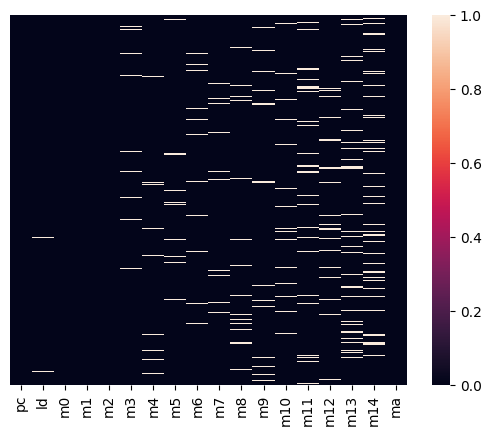

In [ ]:
sns.heatmap(pd.isnull(test_df),yticklabels=0)

In [ ]:
#Performing imputation on test dataset
t_d=test_df.drop(['pc','ma'],axis=1)
test_imp=imputer.transform(t_d)

In [ ]:
test_imp=pd.DataFrame(test_imp,columns=t_d.columns)
test_imp['pc']=test_df['pc']
test_imp['ma']=test_df['ma']

In [ ]:
test_imp.head()

,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,pc,ma
0,156.46,73.5,8.8,105.0,13.2768,113.5365,13.9552,168.5460,8.5896,187.6560,8.3472,178.5945,14.3192,138.0435,12.7008,166.1100,E,m76
1,58.87,84.0,12.8,42.0,14.4440,126.6930,13.6688,190.6275,10.1712,202.5870,8.5416,166.9815,15.5944,142.5690,11.6832,177.7230,y,m78
2,139.68,126.0,3.2,73.5,14.2432,107.4885,13.8544,168.3255,10.2504,214.2735,11.3392,155.1795,16.0256,132.1005,13.0104,185.6085,w,m78
3,194.06,52.5,6.4,105.0,14.5480,138.6105,13.5080,196.6545,10.6304,213.4650,9.9224,191.1000,14.8256,128.0475,12.1984,180.2745,z,m75
4,173.14,42.0,8.0,136.5,14.9496,103.8765,13.8936,168.3570,9.6184,191.2050,9.9400,185.0310,13.8664,124.7610,13.6872,157.6470,x,m55


In [ ]:
test_imp['ma']=le.fit_transform(test_imp['ma'])
test_imp['pc']=le.fit_transform(test_imp['pc'])

In [ ]:
test_imp.head()

,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,pc,ma
0,156.46,73.5,8.8,105.0,13.2768,113.5365,13.9552,168.5460,8.5896,187.6560,8.3472,178.5945,14.3192,138.0435,12.7008,166.1100,0,2
1,58.87,84.0,12.8,42.0,14.4440,126.6930,13.6688,190.6275,10.1712,202.5870,8.5416,166.9815,15.5944,142.5690,11.6832,177.7230,3,3
2,139.68,126.0,3.2,73.5,14.2432,107.4885,13.8544,168.3255,10.2504,214.2735,11.3392,155.1795,16.0256,132.1005,13.0104,185.6085,1,3
3,194.06,52.5,6.4,105.0,14.5480,138.6105,13.5080,196.6545,10.6304,213.4650,9.9224,191.1000,14.8256,128.0475,12.1984,180.2745,4,1
4,173.14,42.0,8.0,136.5,14.9496,103.8765,13.8936,168.3570,9.6184,191.2050,9.9400,185.0310,13.8664,124.7610,13.6872,157.6470,2,0


In [ ]:
data=test_imp.values[:,:-2]
t=trans.transform(data)

In [ ]:
cols=test_imp.iloc[:,:-2].columns
t_scale=pd.DataFrame(t,columns=cols)
t_scale['pc']=test_imp['pc']
t_scale['ma']=test_imp['ma']

In [ ]:
t_scale.head()

,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,pc,ma
0,0.349589,0.259259,0.379310,0.416667,0.348958,0.330934,0.537738,0.378002,0.371628,0.309080,0.367873,0.577247,0.405453,0.638604,0.421720,0.507483,0,2
1,0.072895,0.296296,0.551724,0.166667,0.542690,0.478764,0.496168,0.616221,0.636961,0.474622,0.398730,0.491769,0.527880,0.673095,0.314133,0.591506,3,3
2,0.302013,0.444444,0.137931,0.291667,0.509361,0.262978,0.523107,0.375623,0.650248,0.604191,0.842794,0.404900,0.569278,0.593310,0.454453,0.648560,1,3
3,0.456195,0.185185,0.275862,0.416667,0.559952,0.612671,0.472829,0.681242,0.713998,0.595227,0.617905,0.669294,0.454071,0.562420,0.368604,0.609967,4,1
4,0.396881,0.148148,0.344828,0.541667,0.626610,0.222393,0.528797,0.375963,0.544222,0.348428,0.620698,0.624623,0.361982,0.537372,0.526009,0.446251,2,0


In [ ]:
Y=model_4.predict(t_scale)

**Storing Y in CSV File**

In [ ]:
pd.DataFrame(Y,columns=['pred']).to_csv("Y.csv",index=None,header='pred')